In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [31]:
m = 2    # I can pass more data poits
b = 0.5
x = np.linspace(0,4,100)
y = m * x + b + np.random.randn(*x.shape) + 0.25

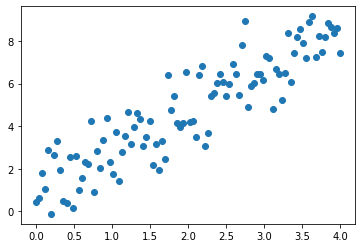

In [32]:
plt.scatter(x,y)

In [33]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
        
    def __call__(self, x):
        return self.weight * x + self.bias
    
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))
    
    
    

In [36]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
        
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)
    

In [37]:
model = Model()
epochs = 100 # we can increase but balance is requaired 
learning_rate = 0.15 #we can increase the learning rate
for epoch in range(epochs):
     y_output = model(x)
     loss = calculate_loss(y, y_output)
     print(f"Epoch: {epoch}, loss: {loss.numpy()}")
     train(model, x, y, learning_rate)
    
    

Epoch: 0, loss: 728.10986328125
Epoch: 1, loss: 517.1316528320312
Epoch: 2, loss: 367.555908203125
Epoch: 3, loss: 261.4893493652344
Epoch: 4, loss: 186.25599670410156
Epoch: 5, loss: 132.87547302246094
Epoch: 6, loss: 94.985107421875
Epoch: 7, loss: 68.07686614990234
Epoch: 8, loss: 48.9563102722168
Epoch: 9, loss: 35.359615325927734
Epoch: 10, loss: 25.682382583618164
Epoch: 11, loss: 18.78728675842285
Epoch: 12, loss: 13.868008613586426
Epoch: 13, loss: 10.352762222290039
Epoch: 14, loss: 7.835959434509277
Epoch: 15, loss: 6.029821395874023
Epoch: 16, loss: 4.730062961578369
Epoch: 17, loss: 3.791604518890381
Epoch: 18, loss: 3.1113476753234863
Epoch: 19, loss: 2.6159722805023193
Epoch: 20, loss: 2.253289222717285
Epoch: 21, loss: 1.9861105680465698
Epoch: 22, loss: 1.7878997325897217
Epoch: 23, loss: 1.6396914720535278
Epoch: 24, loss: 1.5279046297073364
Epoch: 25, loss: 1.4427902698516846
Epoch: 26, loss: 1.377331256866455
Epoch: 27, loss: 1.3264585733413696
Epoch: 28, loss: 1.286

In [43]:
print(model.weight.numpy())
print(model.bias.numpy())

1.8976367
0.9520346


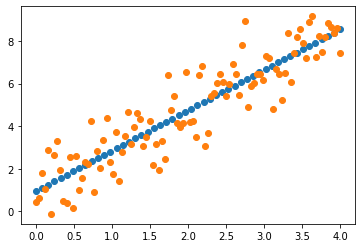

In [46]:
new_x = np.linspace(0, 4, 50)
new_y = model.weight.numpy() * new_x + model.bias.numpy()
plt.scatter(new_x,new_y)
plt.scatter(x,y)